자료 출처: 캐글
https://www.kaggle.com/datasets/taseermehboob9/marketing-campaigns-logistic-regression?resource=download

In [22]:
import pandas as pd

    data = pd.read_csv('/content/Marketingcampaigns.csv', encoding='cp949')
    data.head()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0


In [23]:
data.describe()

,Customer id,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,38.250000,0.550000,0.500000,0.600000,2.10000,0.500000,0.500000
std,5.91608,15.382406,0.510418,0.512989,0.502625,1.68273,0.512989,0.512989
min,1.00000,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.75000,24.500000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,10.50000,38.000000,1.000000,0.500000,1.000000,2.00000,0.500000,0.500000
75%,15.25000,53.500000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000
max,20.00000,62.000000,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000


이용자 대부분이 50대 이하이지만 62세까지의 이용자가 있음.

분석 목적:
1. 구매 여부를 예측
고객의 나이, 성별, 지역, 이메일 반응(Opened, Clicked), 페이지 방문(Product page visit), 프로모션(Discount offered) 등의 변수를 활용하여 최종적으로 구매할 확률을 예측한다.

2. 영향 요인 파악
어떤 요인들이 실제 구매 행동에 긍정적(+) 혹은 부정적(–) 영향을 주는지 확인한다. 특히 이메일 반응, 제품 페이지 방문, 할인 제공 여부 등이 구매 전환에 얼마나 중요한지를 밝히는 것이 핵심이다.

3. 타겟 마케팅 전략 수립
특정 고객군(연령대, 성별, 지역)에서 어떤 디지털 마케팅 채널이 효과적인지를 파악하고, 향후 마케팅 리소스를 효율적으로 배분한다.

기대 인사이트:

1. 이메일 마케팅 효과 분석

- "Email Opened"와 "Email Clicked" 변수가 구매에 직접적으로 연결되는지 확인할 수 있다.

- 클릭 여부가 구매 전환에 미치는 효과가 크다면, 이메일 콘텐츠 최적화가 중요하다는 근거가 된다.

2. 제품 페이지 방문 횟수의 영향

- 방문 횟수가 많을수록 구매 확률이 높아지는지, 혹은 일정 횟수 이상이면 전환으로 이어지지 않는 포인트가 있는지를 파악할 수 있다.

3. 할인 제공 효과 검증

- "Discount offered" 변수가 구매 가능성을 높이는 데 유의한지 검증한다.

- 할인에 민감한 고객층을 타겟팅하는 전략 수립 가능.

4. 인구통계적 요인(연령·성별·지역) 영향

- 특정 연령대(예: 20대 초반, 30대 후반 등)가 이메일/할인보다 더 민감하게 반응하는지 파악.

지역별로 마케팅 채널 효과 차이가 있는지 확인 가능.


In [26]:
data.corr(numeric_only= True)

,Customer id,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
Customer id,1.000000,0.409180,0.200440,-6.936880e-02,-7.079923e-02,0.068729,-0.156080,2.081064e-01
Age,0.409180,1.000000,0.062007,-7.670290e-02,-5.445883e-02,-0.322283,-0.370175,-1.767502e-01
Gender,0.200440,0.062007,1.000000,-3.015113e-01,-1.230915e-01,-0.312519,-0.100504,1.005038e-01
Email Opened,-0.069369,-0.076703,-0.301511,1.000000e+00,1.133117e-17,-0.060971,-0.200000,0.000000e+00
Email Clicked,-0.070799,-0.054459,-0.123091,1.133117e-17,1.000000e+00,0.485381,0.408248,-1.699675e-17
Product page visit,0.068729,-0.322283,-0.312519,-6.097108e-02,4.853811e-01,1.000000,0.731653,3.048554e-01
Discount offered,-0.156080,-0.370175,-0.100504,-2.000000e-01,4.082483e-01,0.731653,1.000000,4.000000e-01
Purchased,0.208106,-0.176750,0.100504,0.000000e+00,-1.699675e-17,0.304855,0.400000,1.000000e+00


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

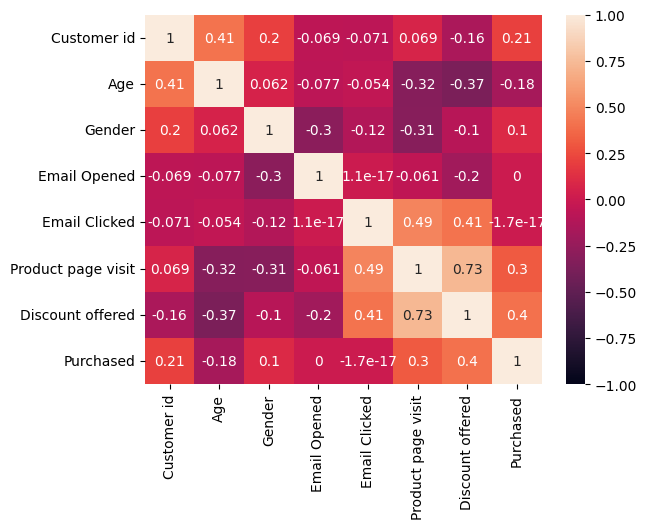

In [29]:
sns.heatmap(data.corr(numeric_only= True),vmax=1, vmin=-1, annot=True)

제품 페이지 방문과 이메일 클릭 수, 그리고 제품 페이지 방문과 할인, 할인과 이메일 클릭 수, 할인과 구매여부가 관련성이 있음을 확인할 수 있음.

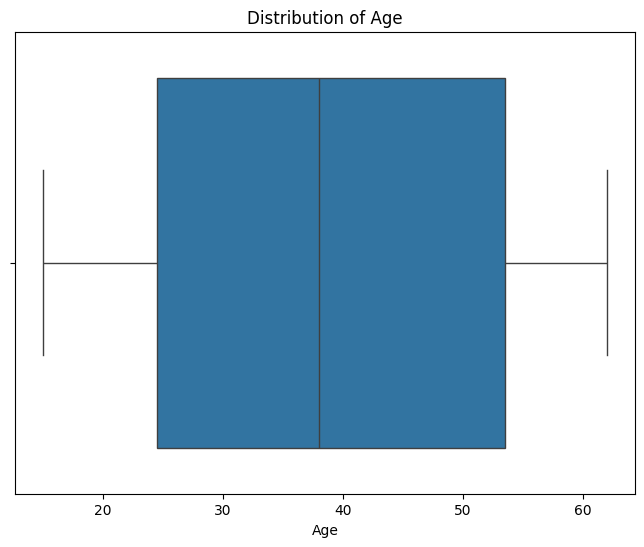

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.title('Distribution of Age')
plt.show()



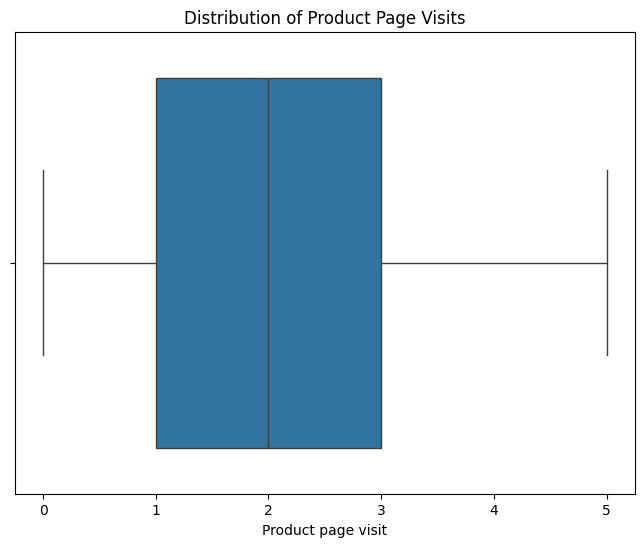

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Product page visit'])
plt.title('Distribution of Product Page Visits')
plt.show()

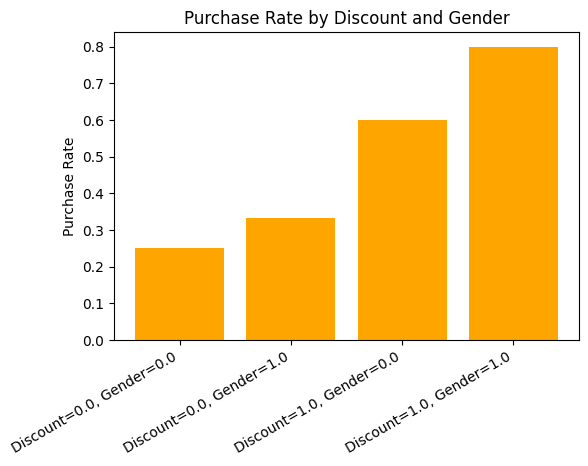

In [51]:
discount_groups = data.groupby(["Discount offered","Gender"])["Purchased"].mean().reset_index()

labels = [f"Discount={row['Discount offered']}, Gender={row.Gender}" for _, row in discount_groups.iterrows()]

plt.figure(figsize=(6,4))
plt.bar(labels, discount_groups["Purchased"], color="orange")
plt.ylabel("Purchase Rate")
plt.title("Purchase Rate by Discount and Gender")
plt.xticks(rotation=30, ha="right")
plt.show()

남성보다 여성의 구매율이 더 높으며, 성별에 의한 차이보다 할인(프로모션)에 의한 구매율 차이가 더 높음을 확인할 수 있음.

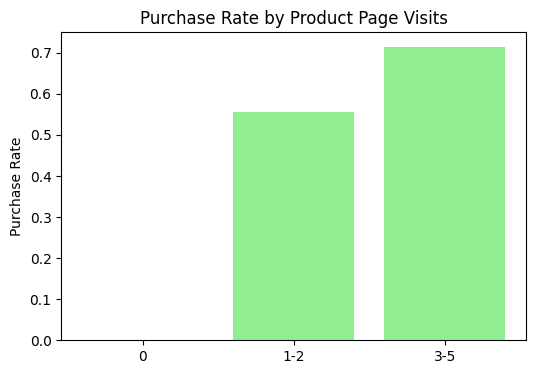

In [69]:
data["Visit_Group"] = pd.cut(data["Product page visit"], bins=[-1,0,2,5], labels=["0","1-2","3-5"])
visit_groups = data.groupby("Visit_Group", observed=True)["Purchased"].mean().reset_index()
plt.figure(figsize=(6,4))
plt.bar(visit_groups["Visit_Group"].astype(str), visit_groups["Purchased"], color="lightgreen")
plt.ylabel("Purchase Rate")
plt.title("Purchase Rate by Product Page Visits")
plt.show()

제품 페이지 방문 수가 높을수록 구매율이 높아짐을 확인할 수 있다.

In [65]:
data["Age_Group"] = pd.cut(data["Age"], bins=[0,19,29,39,49,100],
                         labels=["10대","20대","30대","40대","50대+"])

In [70]:
age_discount = data.groupby(["Age_Group","Discount offered"], observed=True)["Purchased"].mean().unstack()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


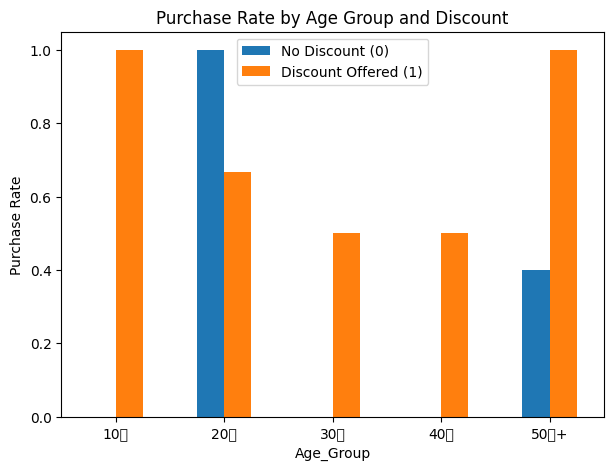

In [71]:
age_discount.plot(kind="bar", figsize=(7,5))

plt.ylabel("Purchase Rate")
plt.title("Purchase Rate by Age Group and Discount")
plt.legend(["No Discount (0)", "Discount Offered (1)"])
plt.xticks(rotation=0)
plt.show()

20대의 경우 프로모션이 없어도 높은 구매율을 보이는 반면, 그외의 연령대의 경우에는 프로모션의 영향을 많이 받는 것으로 보인다.
다만 해당 데이터셋의 개수가 적으므로 더 큰 데이터셋으로의 추가 분석이 필요해보인다.